In [1]:
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

#Load the model
model = VGG16()

In [2]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

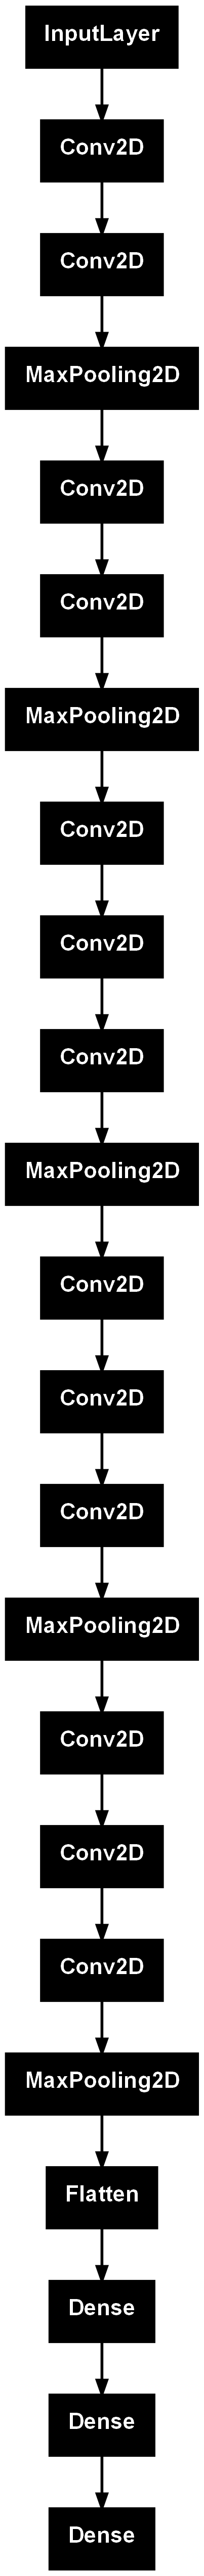

In [3]:
from keras.utils import plot_model

plot_model(model)

In [4]:
for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [5]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

`f_min` represents the minimum value in the filter weights array.\
`f_max` represents the maximum value in the filter weights array.\
`normalized_filters` contains the filter weights normalized to the range [0, 1]

In [6]:
# normalize filter values from 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

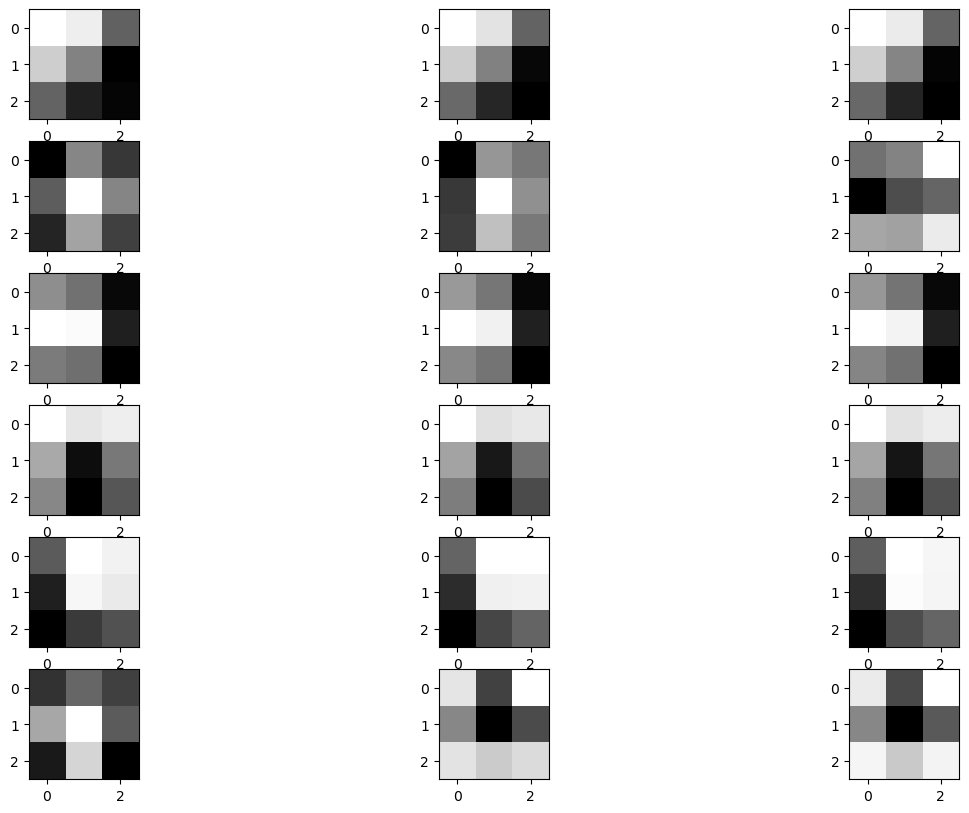

In [7]:
n_filters = 6
ix = 1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

In [8]:
from keras.models import Model
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

In [10]:
# from keras.preprocessing.image import load_img, img_to_array ,ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

import numpy as np
from keras.applications.vgg16 import preprocess_input

image = load_img("/content/chest_Xray.jpeg" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image, axis=0)

image = preprocess_input(image)

FileNotFoundError: [Errno 2] No such file or directory: '/content/chest_Xray.jpeg'

1/1 [==============================] - 2s 2s/step


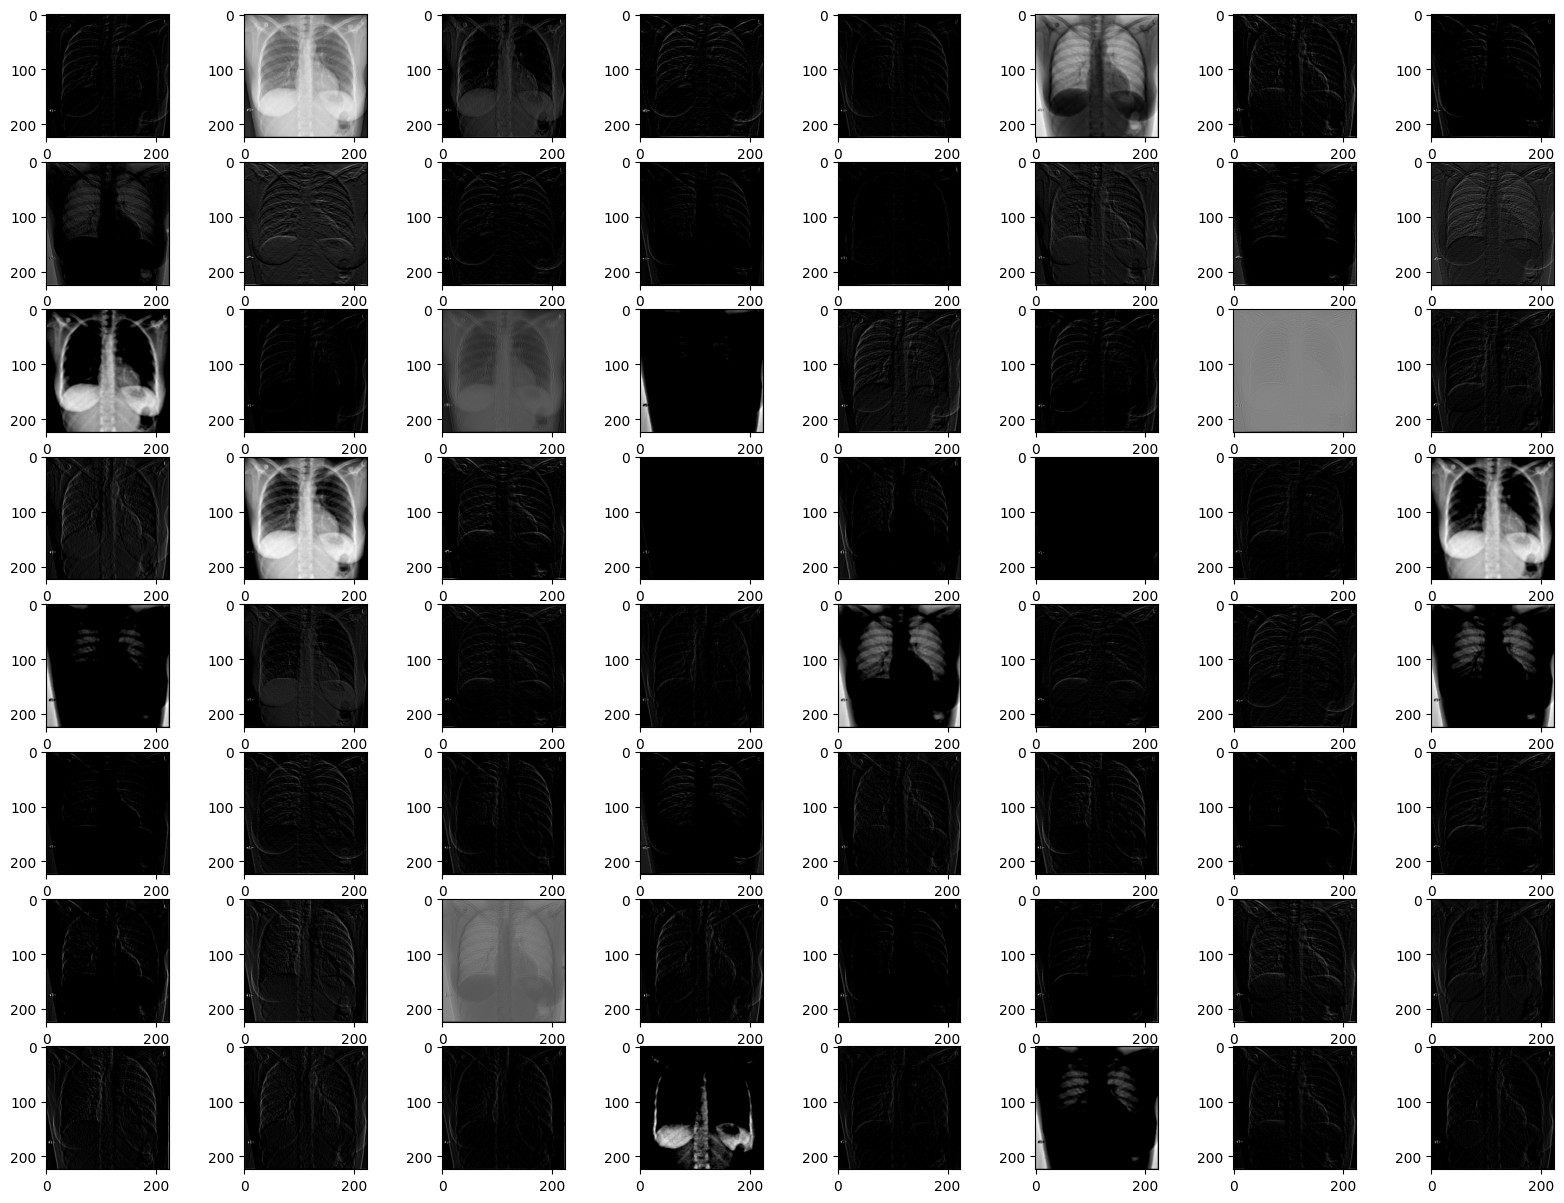

In [ ]:
#calculating features_map
features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()

In [ ]:
model2 = VGG16()

In [ ]:
layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

1/1 [==============================] - 1s 1s/step


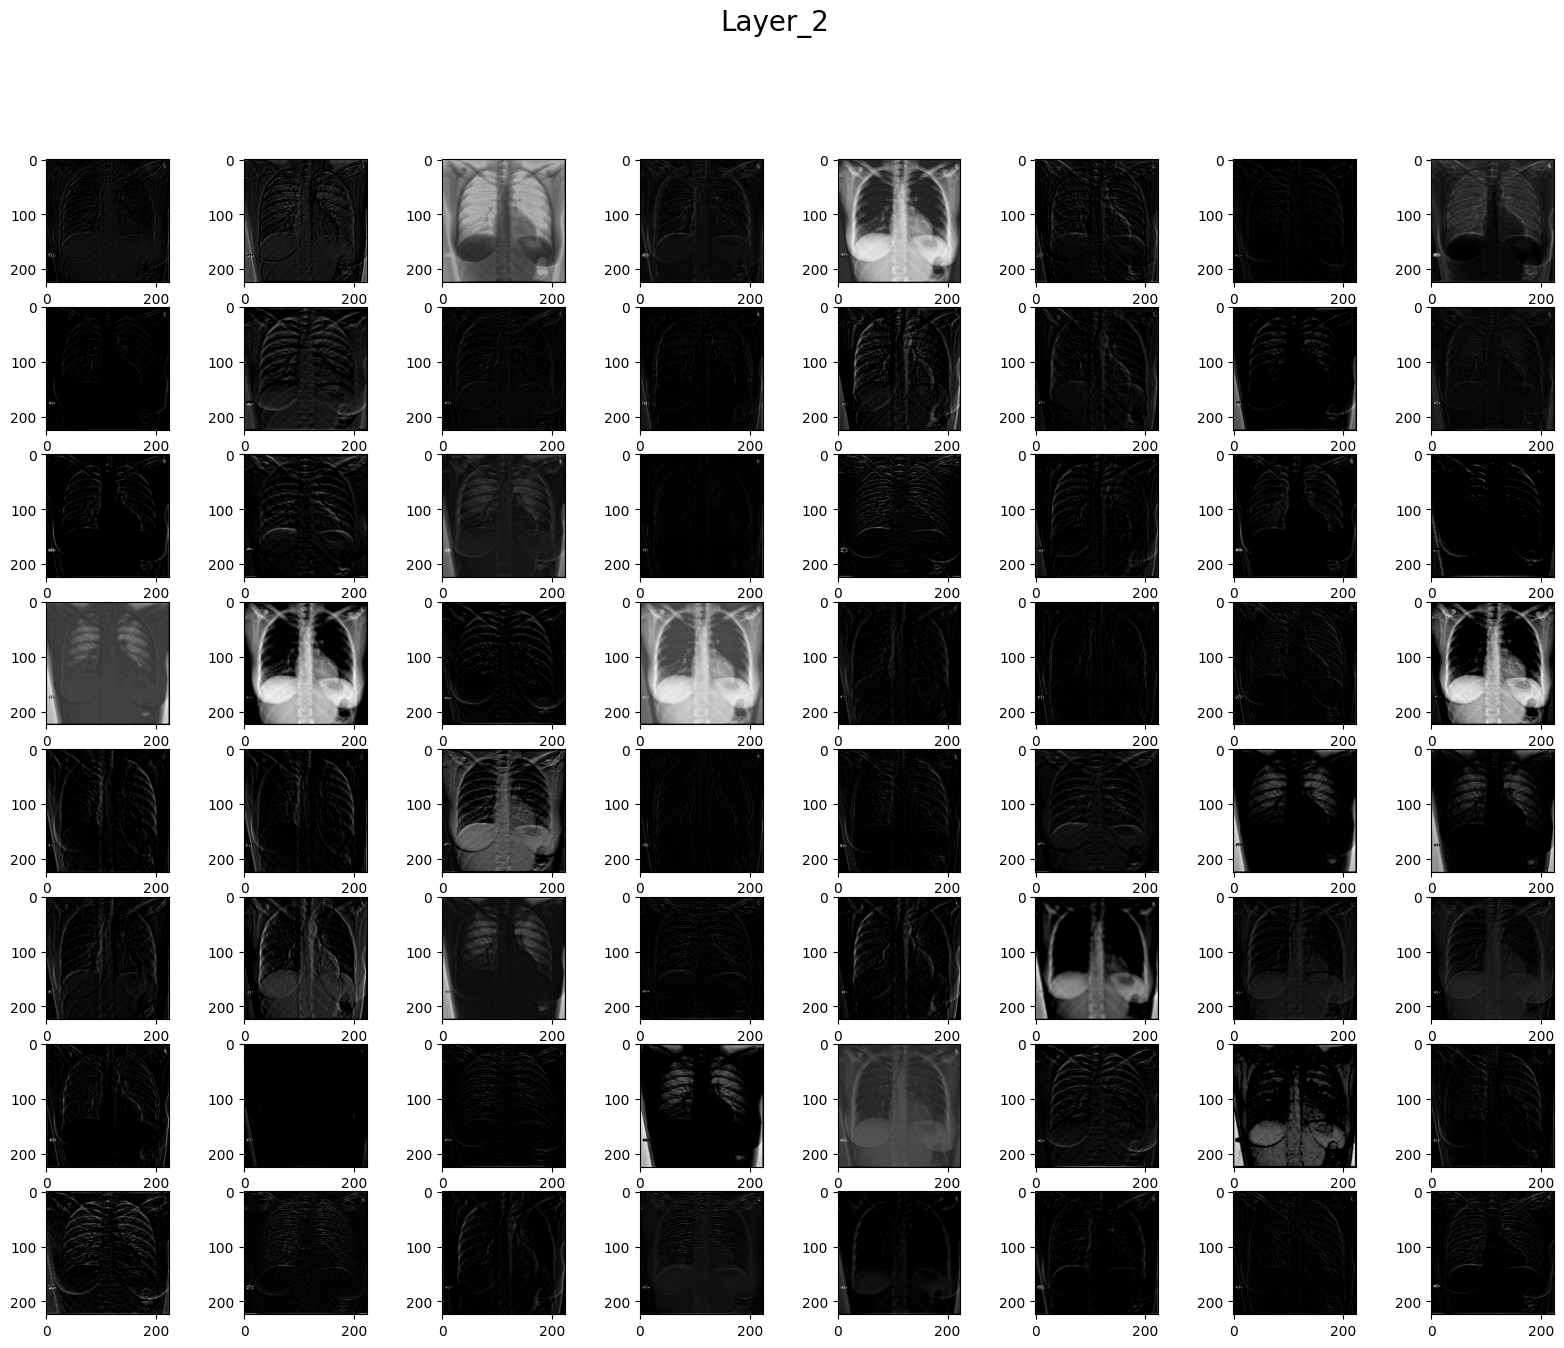

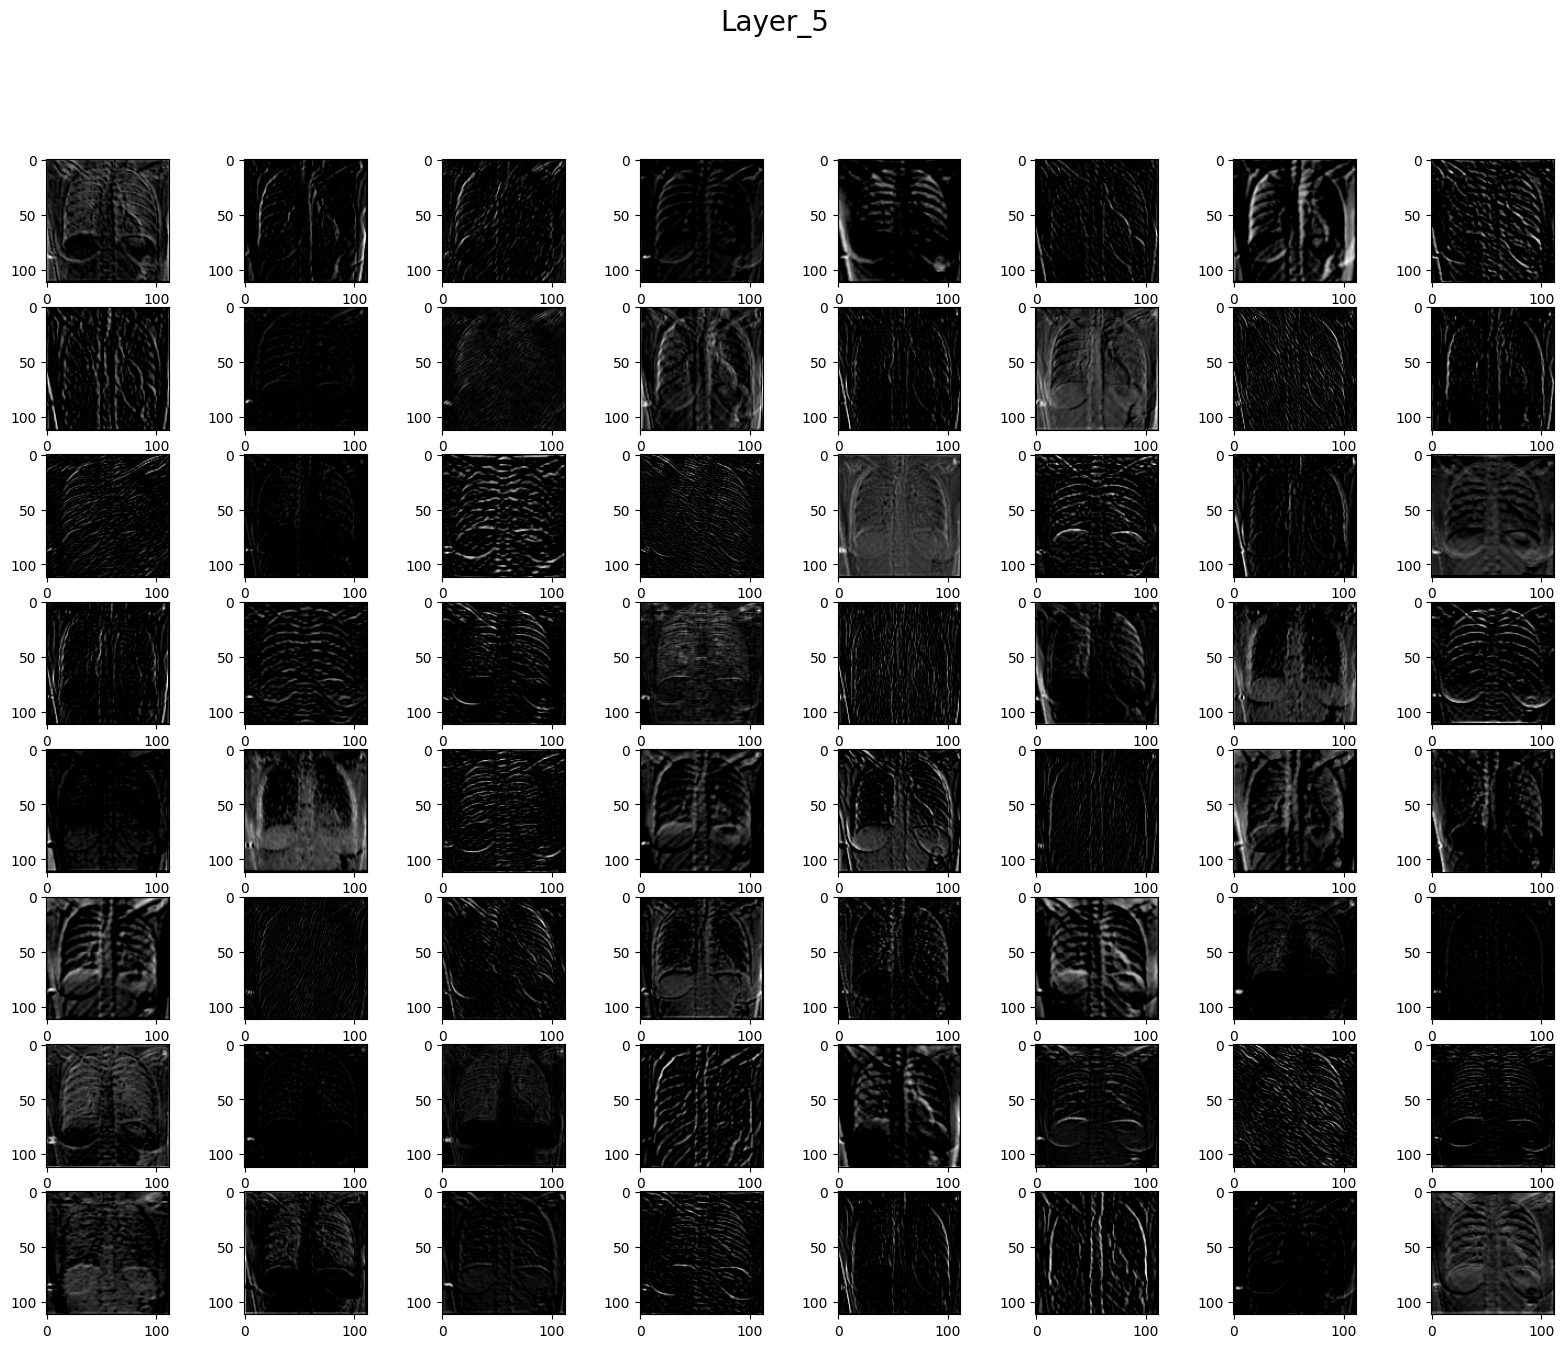

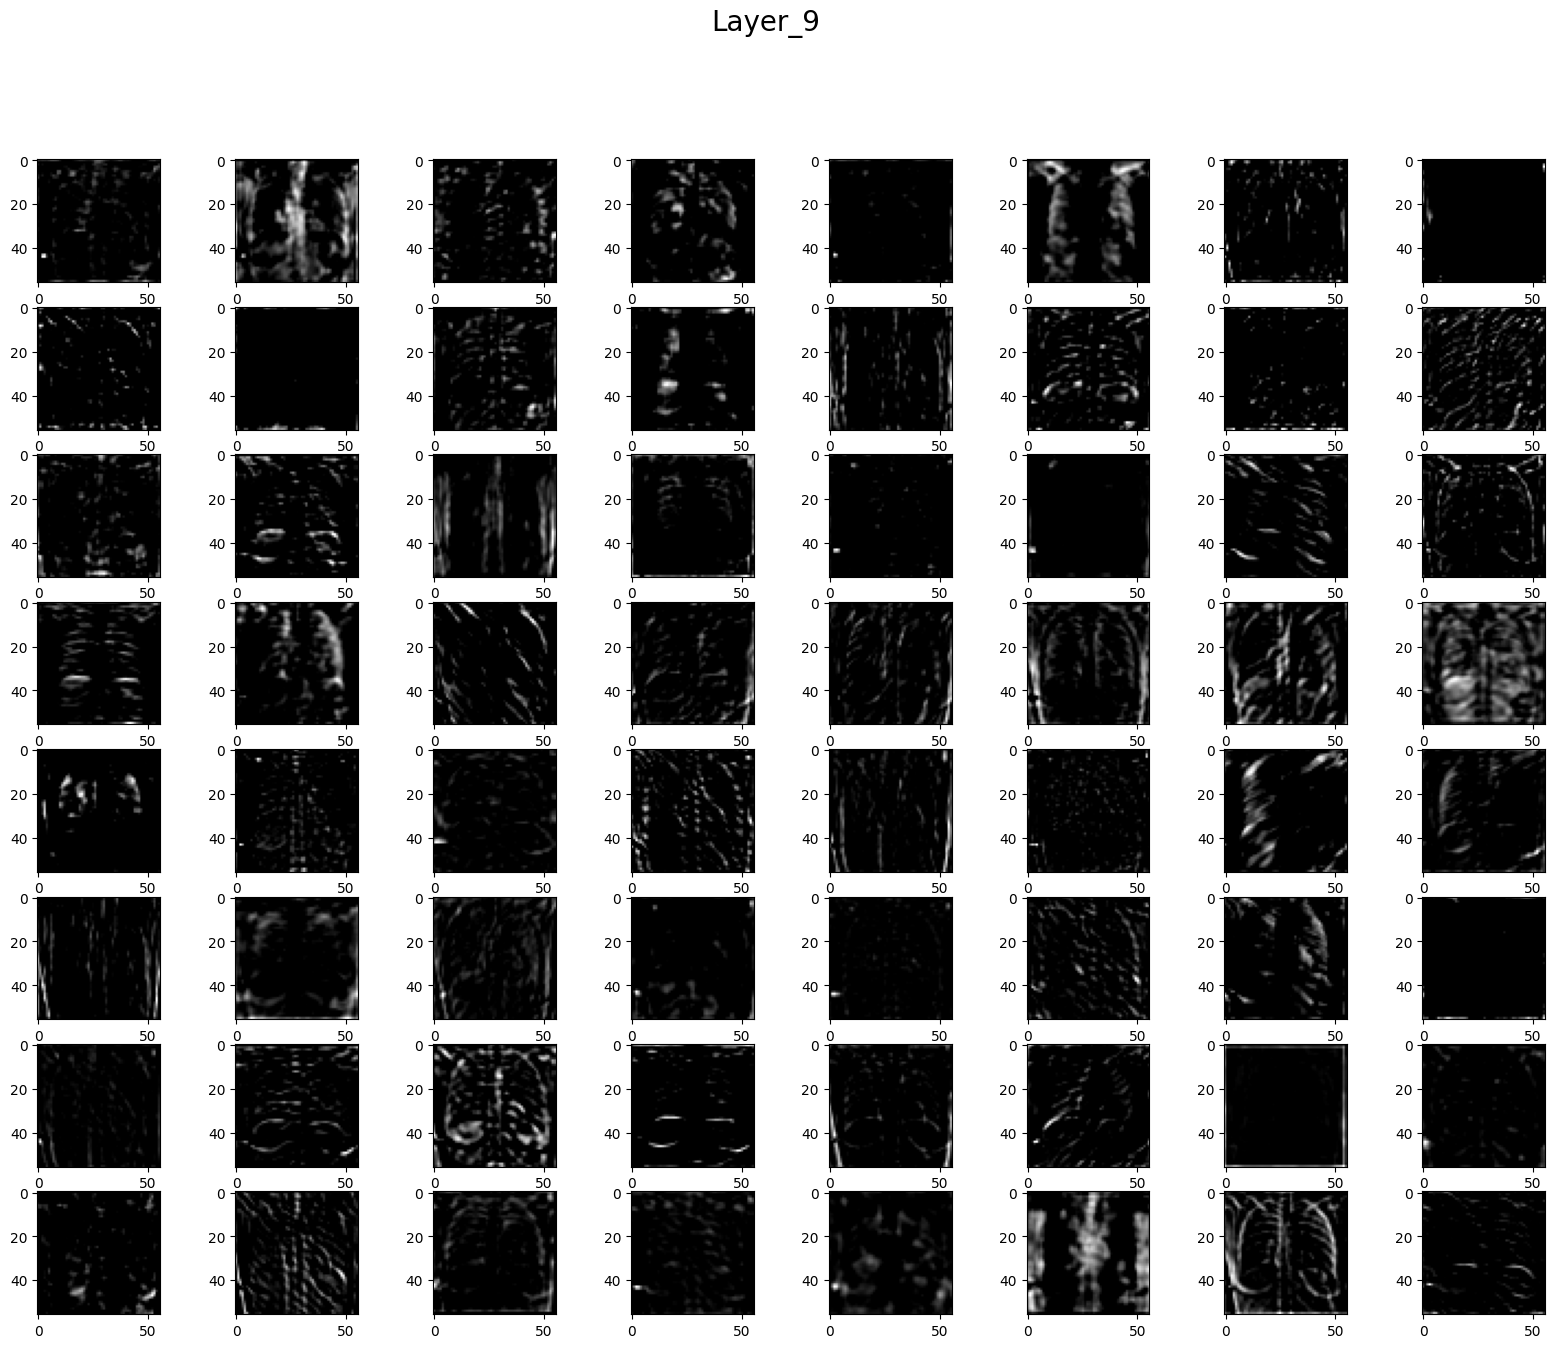

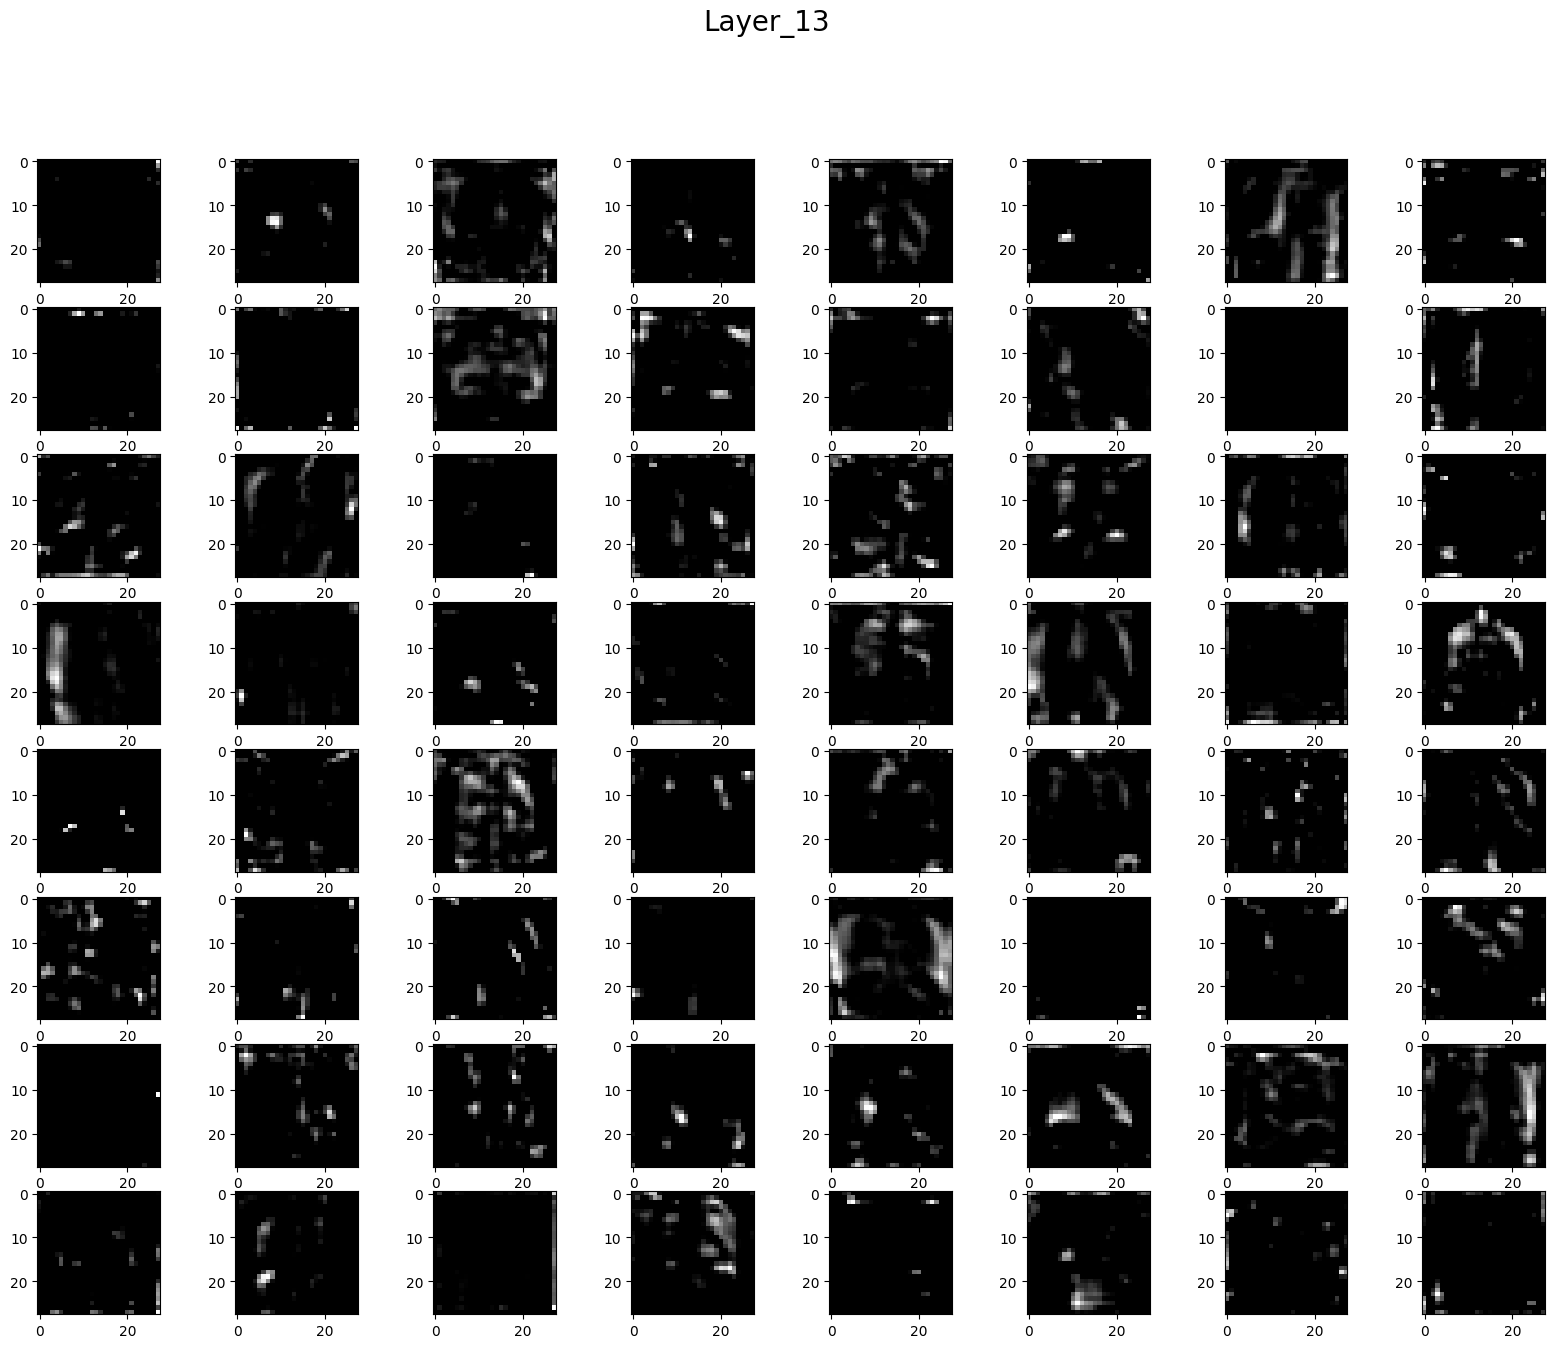

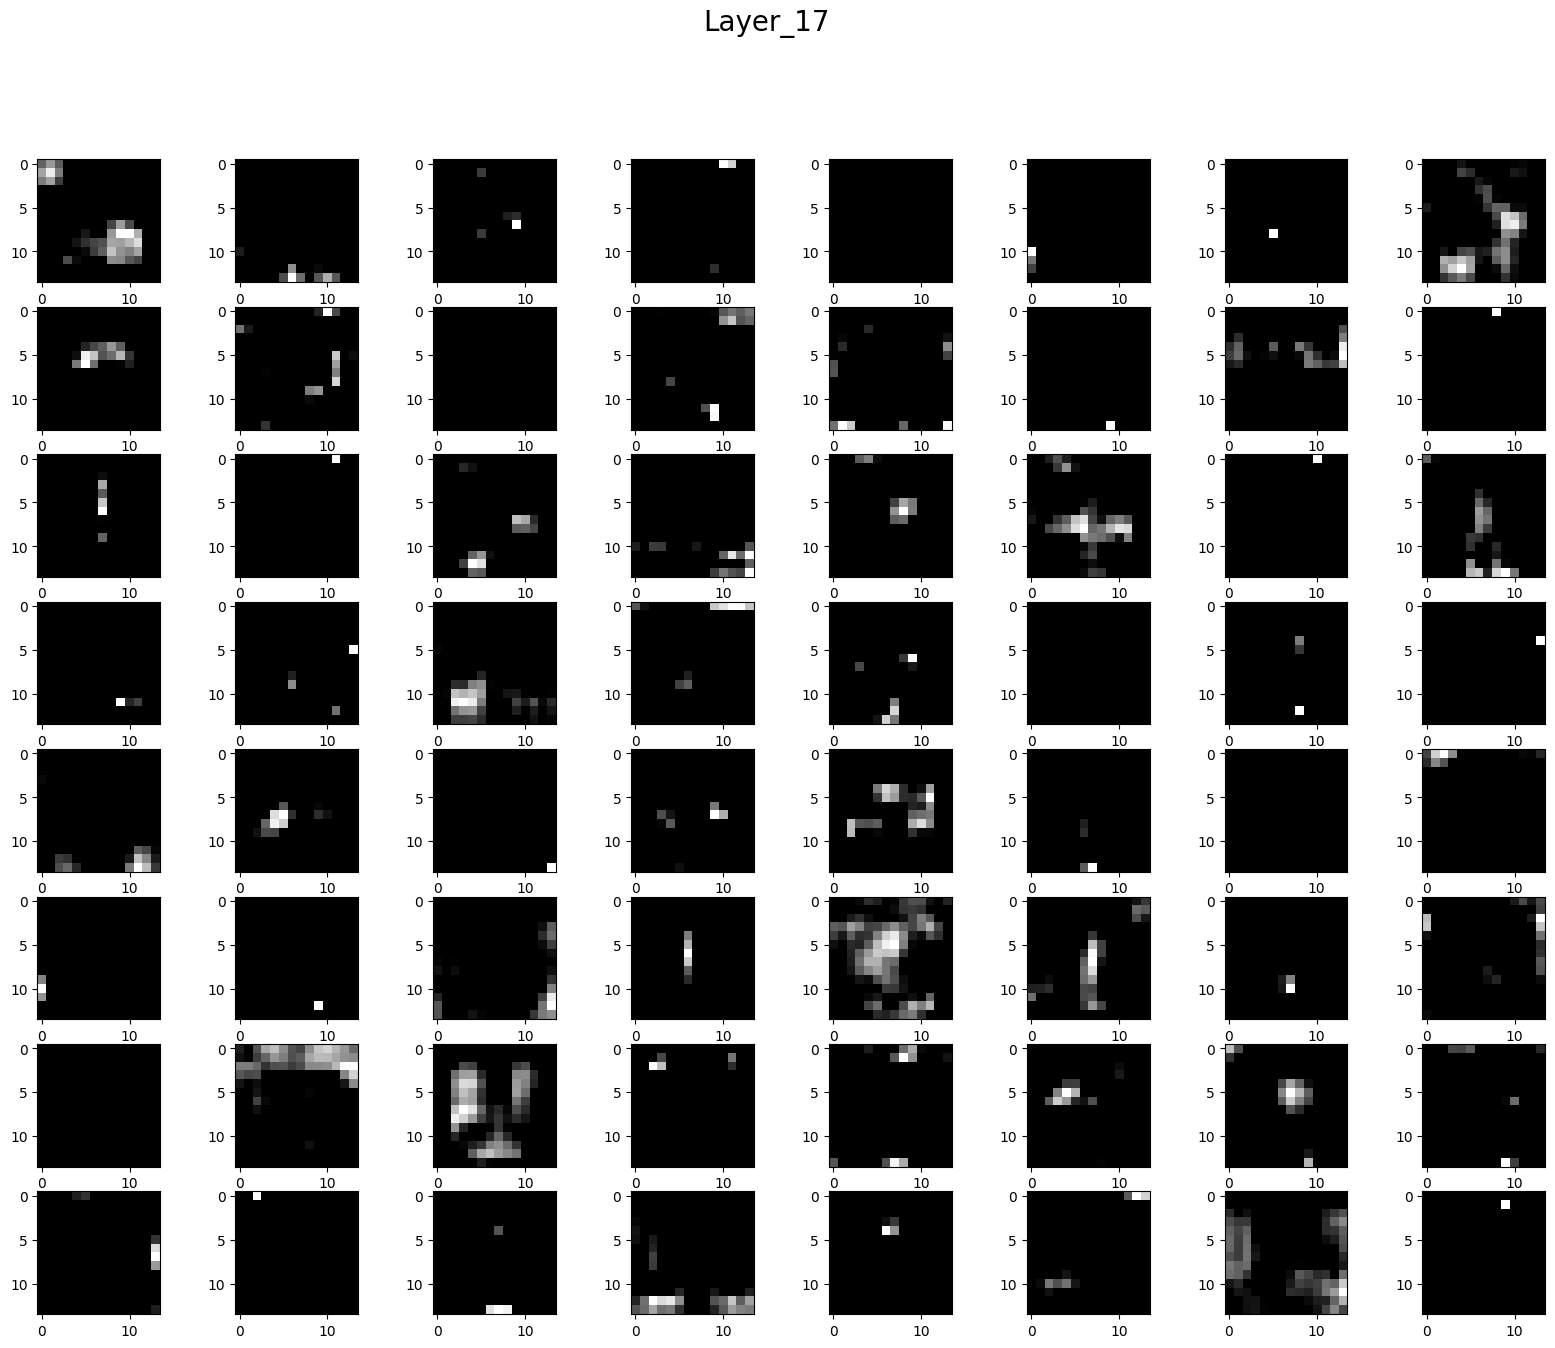

In [ ]:
feature_map = model3.predict(image)

for i,fmap in zip(layer_index,feature_map):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:26<00:00, 124MB/s]
100% 2.29G/2.29G [00:26<00:00, 92.4MB/s]


In [ ]:
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [ ]:
data_dir = "/content/chest_xray/train"
class_names=os.listdir(data_dir)
# class_names = ['NORMAL', 'PNEUMONIA']
print(class_names)

['PNEUMONIA', 'NORMAL']


In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/chest_xray/train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    )

valid_generator = train_datagen.flow_from_directory(
    '/content/chest_xray/test',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


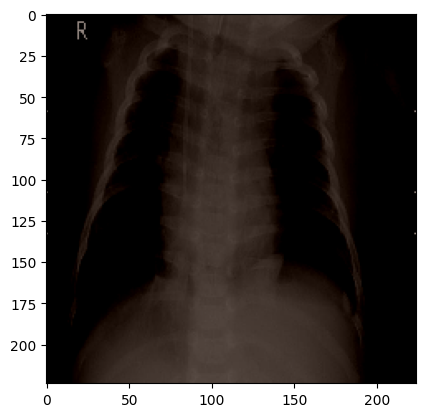

In [ ]:
x,y=train_generator[2]
plt.imshow(np.asarray(x[0])/255)

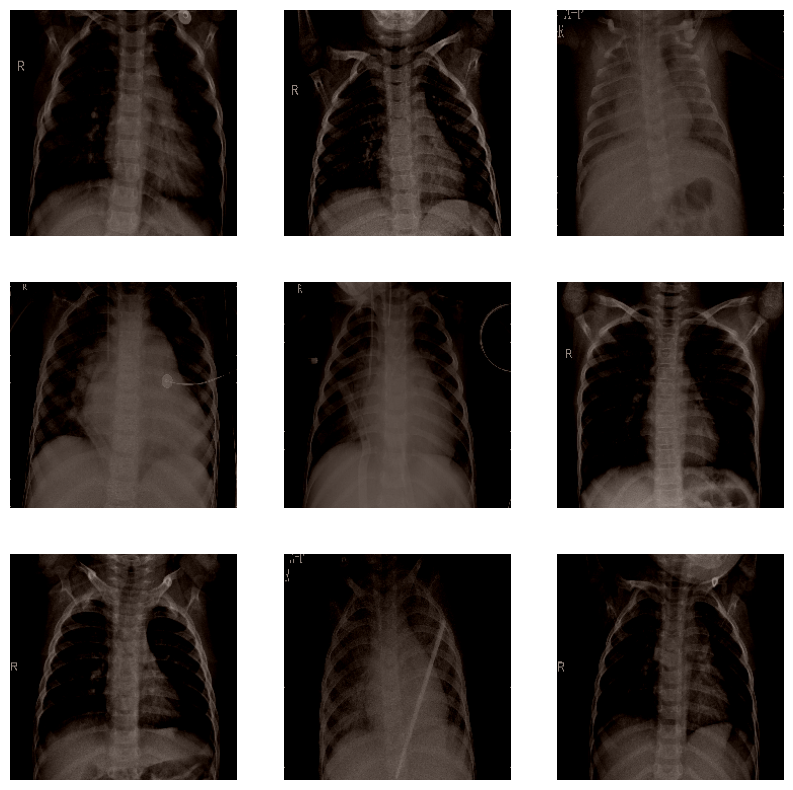

In [ ]:
images, labels = train_generator.next()
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.asarray(images[i])/255)
    plt.axis('off')
plt.show()

In [ ]:
model = VGG16(weights='imagenet',input_shape=(224, 224, 3))

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

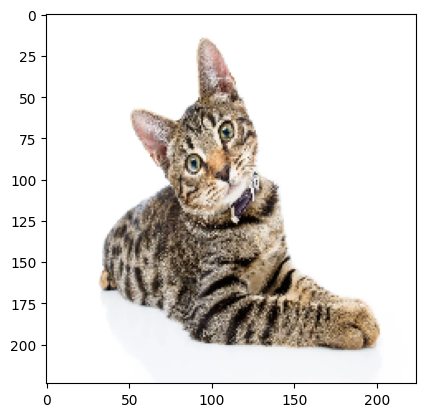

In [ ]:
img_path = '/content/cat.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img , cmap='gray')
plt.show()

In [ ]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02124075', 'Egyptian_cat', 0.7542009), ('n02123045', 'tabby', 0.17886083), ('n02123159', 'tiger_cat', 0.040777583)]


In [ ]:
conv_base = VGG16(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

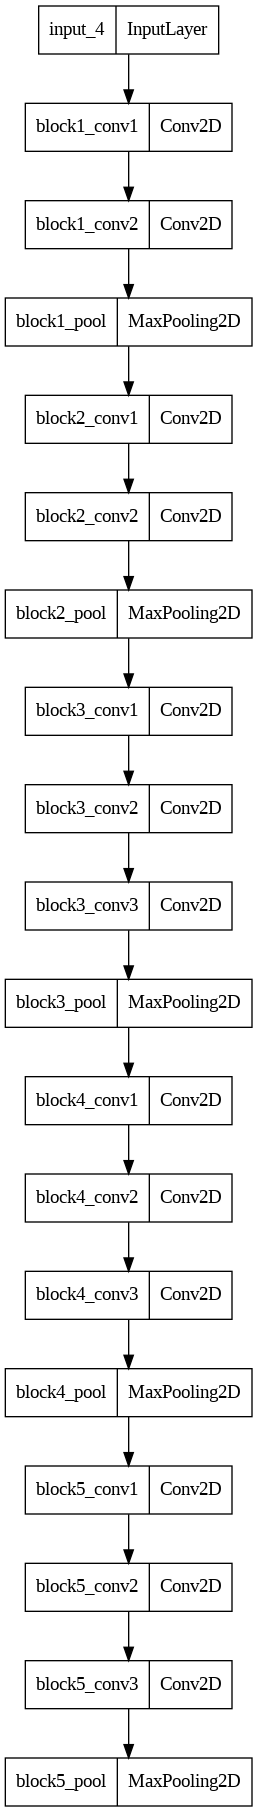

In [ ]:
from keras.utils import plot_model

plot_model(conv_base)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 21137729 (80.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv_base.trainable= False

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/chest_xray/chest_xray/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/chest_xray/chest_xray/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
        train_generator,
        epochs=3,
        validation_data=validation_generator)

Epoch 1/3
163/163 [==============================] - 116s 660ms/step - loss: 0.3231 - accuracy: 0.8976 - val_loss: 0.2376 - val_accuracy: 0.9151
Epoch 2/3
163/163 [==============================] - 110s 675ms/step - loss: 0.1329 - accuracy: 0.9490 - val_loss: 0.2373 - val_accuracy: 0.9119
Epoch 3/3
163/163 [==============================] - 104s 637ms/step - loss: 0.1078 - accuracy: 0.9626 - val_loss: 0.2479 - val_accuracy: 0.9135


In [ ]:
test_loss, test_acc = model.evaluate(valid_generator)
print('Test Accuracy:', test_acc)

10/10 [==============================] - 25s 1s/step - loss: 7.3325 - accuracy: 0.5000
Test Accuracy: 0.5


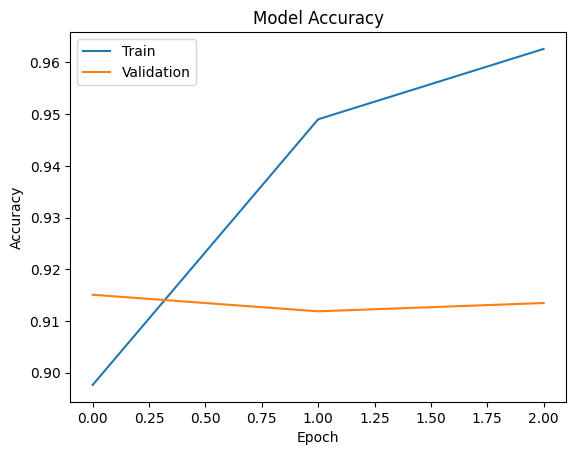

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

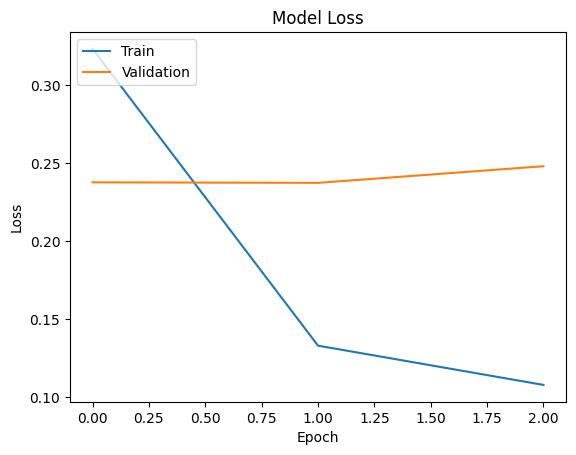

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = "/content/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg"  # Provide the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Load and resize the image

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to create a batch
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions (assuming binary classification)
predicted_class = "PNEUMONIA" if predictions[0] > 0.5 else "NORMAL"

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 62ms/step
Predicted class: PNEUMONIA


FINETUNING:

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_5 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=4,validation_data=validation_ds)

Epoch 1/4
163/163 [==============================] - 42s 245ms/step - loss: 0.3670 - accuracy: 0.8535 - val_loss: 0.5892 - val_accuracy: 0.8013
Epoch 2/4
163/163 [==============================] - 44s 255ms/step - loss: 0.1059 - accuracy: 0.9628 - val_loss: 0.6696 - val_accuracy: 0.7965
Epoch 3/4
163/163 [==============================] - 43s 255ms/step - loss: 0.0713 - accuracy: 0.9739 - val_loss: 1.2195 - val_accuracy: 0.7548
Epoch 4/4
163/163 [==============================] - 42s 246ms/step - loss: 0.0547 - accuracy: 0.9789 - val_loss: 1.1636 - val_accuracy: 0.7628


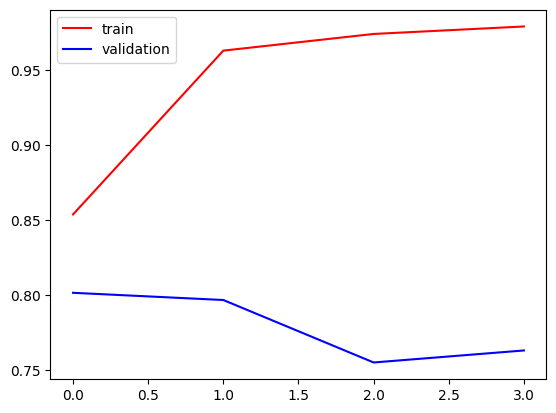

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

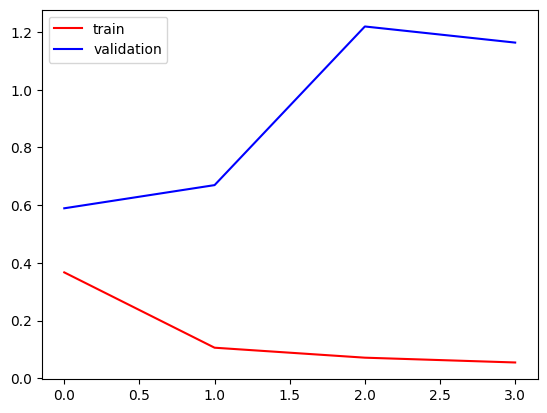

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = "/content/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg"  # Provide the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Load and resize the image

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to create a batch
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions (assuming binary classification)
predicted_class = "PNEUMONIA" if predictions[0] > 0.5 else "NORMAL"

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 162ms/step
Predicted class: NORMAL


INCEPTION

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip

In [ ]:
data_dir = "/content/Training"
class_names=os.listdir(data_dir)

print(class_names)

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/Training',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    )

valid_generator = train_datagen.flow_from_directory(
    '/content/Testing',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    )

In [ ]:
# Load a sample image directly from the file path and visualize it
sample_image_path = '/content/Training/glioma/Tr-glTr_0000.jpg'
sample_image = plt.imread(sample_image_path)
plt.imshow(sample_image)
plt.show()

In [ ]:
images, labels = train_generator.next()
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [ ]:
# Load the pre-trained InceptionV3 model without the top classification layer
conv_base =InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
conv_base.summary()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()

# Assuming conv_base is your pre-trained convolutional base
model.add(conv_base)

# Flatten the output of the convolutional base
model.add(Flatten())

# Add a dense layer with 256 units and relu activation
model.add(Dense(256, activation='relu'))

# Add the output layer with 4 units (for 4 classes) and softmax activation
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
conv_base.trainable= False

In [ ]:
for layer in conv_base.layers:
    print(layer.name, layer.trainable)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=valid_generator)

In [ ]:
test_loss, test_acc = model.evaluate(valid_generator)
print('Test Accuracy:', test_acc)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = "/content/Testing/pituitary/Te-piTr_0000.jpg"  # Provide the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Load and resize the image

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to create a batch
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions for multi-class classification
class_names = ['meningioma', 'notumor', 'glioma', 'pituitary']
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)


FINE TUNING:

In [ ]:
# Create a new Sequential model
model = Sequential()

# Add the pre-trained convolutional base
model.add(conv_base)

# Flatten the output of the convolutional base
model.add(Flatten())

# Add a dense layer with 256 units and relu activation
model.add(Dense(256, activation='relu'))

# Add the output layer with 4 units (for 4 classes) and softmax activation
model.add(Dense(4, activation='softmax'))

In [ ]:
# Unfreeze just the 'mixed10' layer for fine-tuning
for layer in conv_base.layers:
    if layer.name == 'mixed10':
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
for layer in conv_base.layers:
    print(layer.name, layer.trainable)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


In [ ]:
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=valid_generator)

In [ ]:
test_loss, test_acc = model.evaluate(valid_generator)
print('Test Accuracy:', test_acc)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = "/content/Testing/glioma/Te-glTr_0000.jpg"  # Provide the path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Load and resize the image

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to create a batch
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions for multi-class classification
class_names = ['meningioma', 'notumor', 'glioma', 'pituitary']
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)


## RESNET50:

In [ ]:
import cv2
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

In [ ]:
dataset_path = r'Glaucoma_dataset'

In [ ]:
img_types = os.listdir(dataset_path)
print(img_types)

print("types of  images" , len(img_types))

In [ ]:
images_list = []

for item in img_types:
    #Get all the files name
    all_images = os.listdir('Glaucoma_dataset/' + '/' + item)
    #add them to the list
    for img in all_images:
        images_list.append((item , str('Glaucoma_dataset/' + '/' + item) + '/' + img))
images_list

In [ ]:
#Build a dataframe
disease_df = pd.DataFrame(data=images_list , columns=['disease type' , 'image'])
print(disease_df.head())

In [ ]:
#Let's Check how many samples for each category are present
print("Total number of images in the dataset:" , len(disease_df))

img_count= disease_df['disease type'].value_counts()
print("images in each category: ")
print(img_count)

In [ ]:
path = r'Glaucoma_dataset/'

im_size = 224

images = []
labels = []
for i in img_types:
    data_path = path + str(i) #entered the 1st folder and then 2nd and then 3rd
    filenames = [i for i in os.listdir(data_path)]
    #print("filesnames") #will print all the names of images

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img , (im_size, im_size))
        images.append(img)
        labels.append(i)
labels

In [ ]:
images = images.astype('float32')/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y = disease_df['disease type'].values
#for y
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)

y = y.reshape(-1,1)
onehotencoder = OneHotEncoder(categories='auto', sparse=False) #converted scaler output to a vector output
y = onehotencoder.fit_transform(y)

print(y.shape)
y

In [ ]:
images = np.array(images)  # Converting images to NumPy array
images = images.astype('float32') / 255.0  # Normalizing images
X = images  # Assigning images to X
X.shape

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)


In [ ]:
print("Shape of X (images):", X.shape)
print("Shape of y (one-hot encoded labels):", y.shape)

# Let's Start with ResNet Algorithm using Keras:

In [ ]:
import keras
from keras import layers
from keras.layers import Input,Activation,Add,Dense,ZeroPadding2D,BatchNormalization,Flatten,Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt


#identity_block

In [ ]:
def identity_block(X , f, filters):
    #Retrieve Filters
    F1,F2,F3 = filters
    x_shortcut = X

    #First Layer
    X = Conv2D(filters=F1 , kernel_size=(1,1), strides=(1,1),padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    #Second_Layer
    X = Conv2D(filters=F2 , kernel_size=(f,f) , strides=(1,1) , padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    #Third Layer
    X = Conv2D(filters=F3 , kernel_size=(1,1) , strides=(1,1) , padding='valid')(X)
    X = BatchNormalization(axis=3)(X)

    #Final Step: Add shortcut value F(X), and pass it through a RELU activation
    X = Add() ([X, x_shortcut])
    X = Activation('relu')(X)
    return X

#Convolutional Block

In [ ]:
def convolutional_block(X, f , filters, s=2):
    #Retrieve Filters
    F1,F2,F3 = filters
    x_shortcut = X

    #First Layer
    X = Conv2D(filters=F1 , kernel_size=(1,1), strides=(s,s),padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    #Second_Layer
    X = Conv2D(filters=F2 , kernel_size=(f,f) , strides=(1,1) , padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    #Third_Layer
    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1),padding='valid')(X)
    X = BatchNormalization(axis=3)(X)

    #### SHORTCUT PATH #### CONV 1*1
    x_shortcut = Conv2D(filters=F3,kernel_size=(1,1), strides=(1,1),padding='valid')(X)
    x_shortcut = BatchNormalization(axis=3)(X)

    #Final Step: Add shortcut value here, and pass it through a RELU activation
    X = Add()([X, x_shortcut])
    X = Activation('relu')(X)
    return X

#Creating Resnet50:

In [ ]:
def ResNet50(input_shape=(224,224,3) , classes=2):
    #Define the input shape
    X_input = Input(input_shape)

    #zero_padding
    X = ZeroPadding2D((3,3))(X_input) #3,3 padding

    #STAGE 1:
    X = Conv2D(64,(7,7),strides=(2,2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3) , strides=(2,2))(X)

    #STAGE 2:
    X = convolutional_block(X, f=3 , filters=[64,64,256],s=1)

    X = identity_block(X , 3 , [64,64,256])

    X = identity_block(X , 3 , [64,64,256])

    #STAGE 3:
    X = convolutional_block(X, f=3 , filters=[128,128,512],s=2)
    X = identity_block(X, 3 , [128,128,512])
    X = identity_block(X, 3 , [128,128,512])
    X = identity_block(X, 3 , [128,128,512])

    #STAGE 4:
    X = convolutional_block(X , f=3, filters=[256,256,1024],s=2)

    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])
    X = identity_block(X, 3, [256,256,1024])

    #STAGE 5:
    X = convolutional_block(X, f=3, filters=[512,512,2048],s=2)

    X = identity_block(X, 3 , [512,512,2048])
    X = identity_block(X, 3 , [512,512,2048])


    #AVG POOL
    X = AveragePooling2D((2,2) , name='avg_pool')(X)



    #OUTPUT LAYER
    X = Flatten()(X)
    X = Dense(classes , activation='softmax' , name='FC'+str(classes), kernel_initializer= glorot_uniform(seed=0))(X)


    #CREATE MODEL
    model = Model(inputs = X_input, outputs= X , name="ResNet50")

    return model

In [ ]:
model = ResNet50(input_shape = (224,224,3) , classes = 2)

In [ ]:
model.compile(optimizer='Adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history=model.fit(x_train,y_train, epochs = 5 , batch_size= 32, validation_data=(x_test,y_test))

In [ ]:
# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#Testing Model:

In [ ]:
from matplotlib.pyplot import imread
img_path = 'normal.png'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print("input image shape:" , x.shape)
img = imread(img_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
print(model.predict(x))